### Импорт библиотек

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict

### Импорт функций

In [4]:
from funcs.community_detection_funcs import community_detection_recursive_with_limit

### Получение графа

In [5]:
import os
os.chdir('../..')

In [6]:
filename = 'data_arab/graph_collapse.txt'

G = nx.Graph()

with open(filename, 'r') as file:
    for line in file:
        node1, node2 = line.strip().split()
        G.add_edge(node1, node2)

#### Выгружаем данные о классах

In [7]:
df = pd.read_csv('data_arab/graph_collapse_nodes_2.txt', delimiter='\t')

node_family_dict = df.set_index('node')['fam'].to_dict()
unique_fams = set(node_family_dict.values())
colors = plt.get_cmap('tab20', len(unique_fams))
fam_to_color = {cls: colors(i) for i, cls in enumerate(unique_fams)}
node_colors = [fam_to_color[node_family_dict[node]] for node in G.nodes]

families = defaultdict(set)
for node, family in node_family_dict.items():
    families[family].add(node)

#### Получаем самую большую компоненту

In [8]:
components = list(nx.connected_components(G))
components.sort(key=len, reverse=True)
largest_component = components[0]
G_largest = G.subgraph(largest_component).copy()

#### Получаем кластеры

In [12]:
clusters_dict = community_detection_recursive_with_limit(G_largest, max_size=20, max_depth=5)

Когда мы знаем, какие вершины к каким классам относятся - посмотрим, какие разбиения на классы наиболее точные. 

`threshold` - задаем порог того, какая доля вершин из кластера лежит в одном семействе.

In [13]:
matching_clusters = []
threshold = 0.6

for cluster_nodes in clusters_dict.values():
    families_in_cluster = defaultdict(int)
    for node in cluster_nodes:
        family = node_family_dict.get(node)
        if family:
            families_in_cluster[family] += 1

    for family, count in families_in_cluster.items():
        if count / len(cluster_nodes) >= threshold:
            matching_clusters.append(cluster_nodes)
            break

### Визуализация

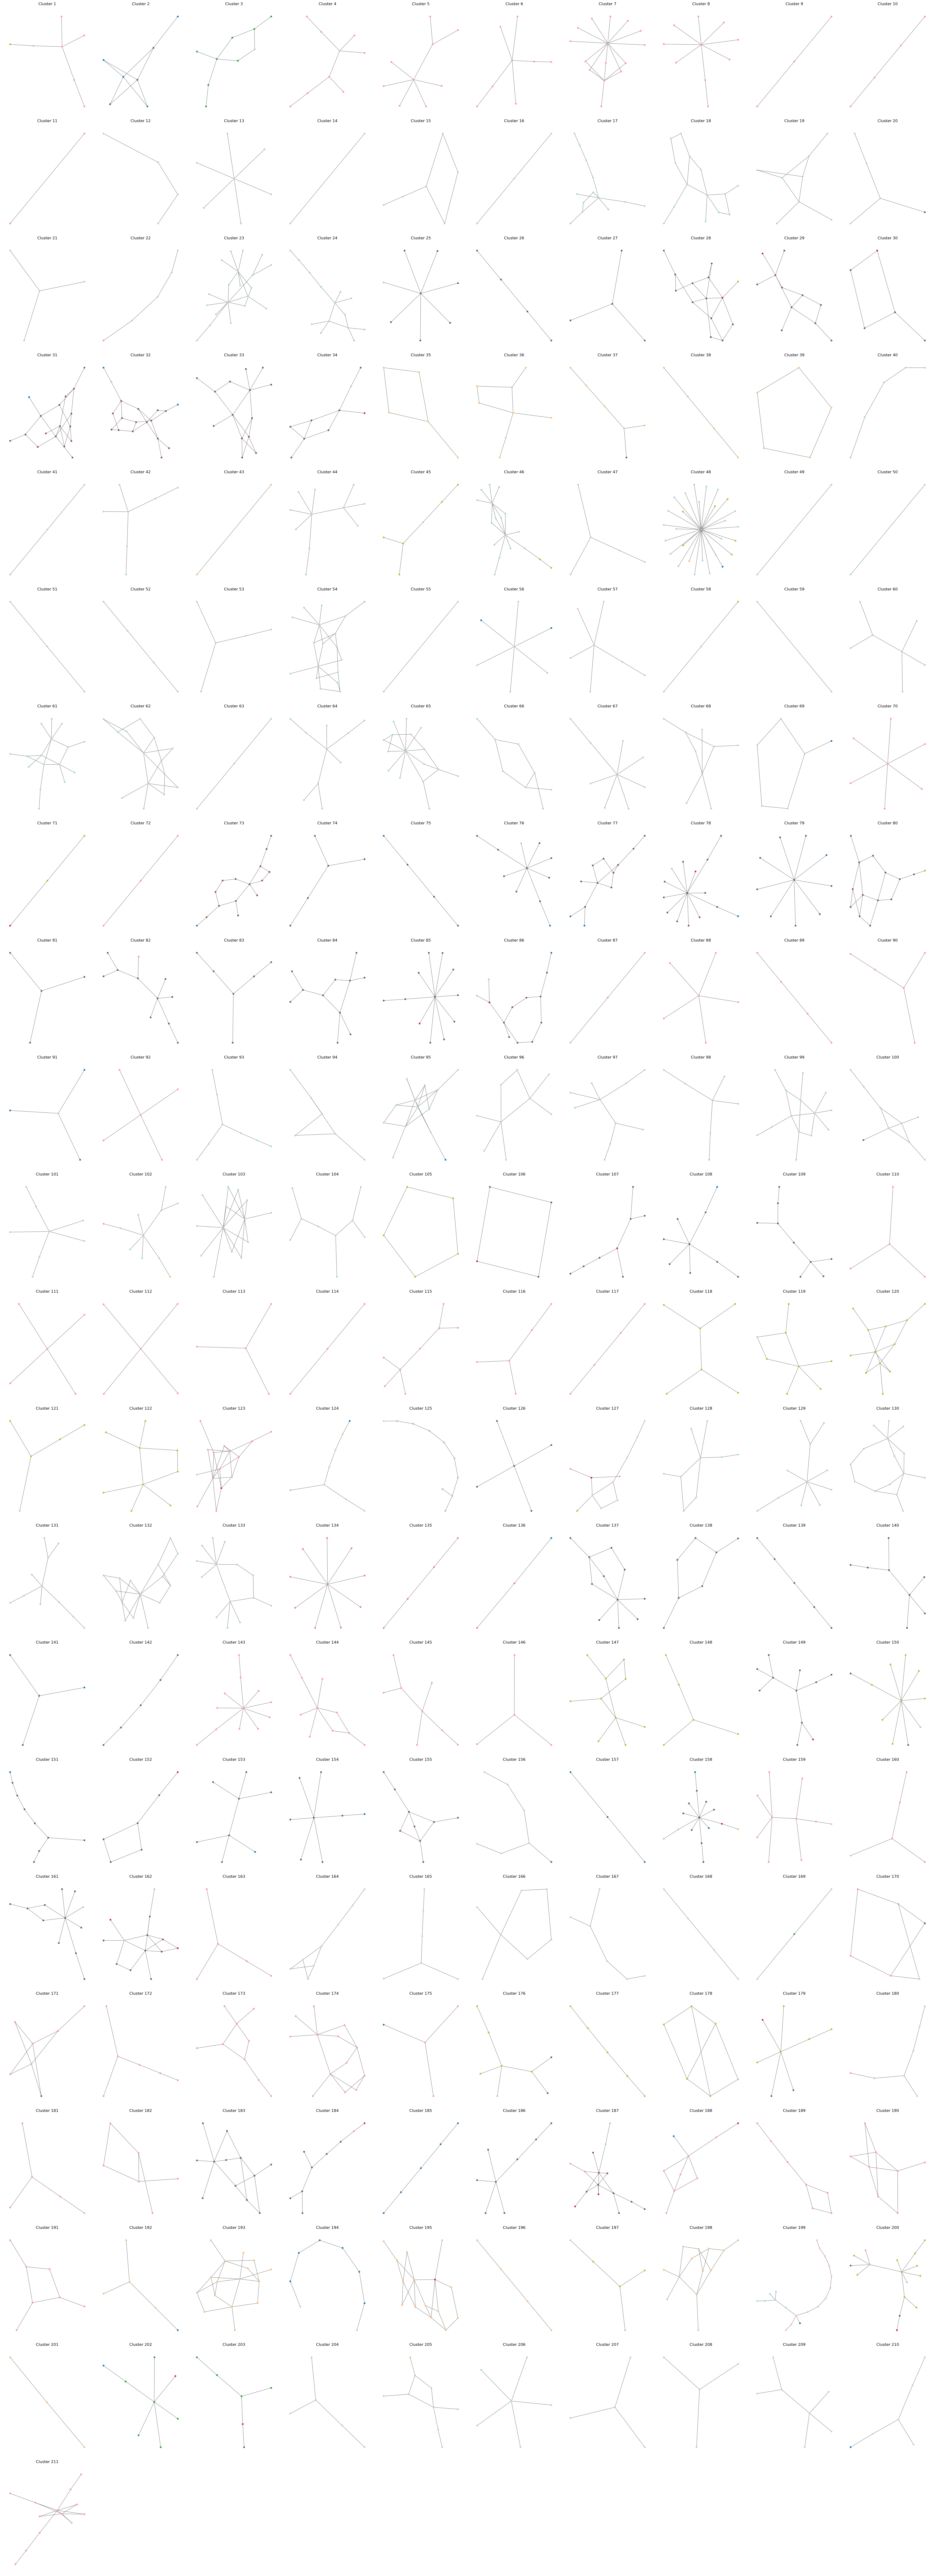

In [14]:
num_clusters = len(matching_clusters)
cols = 10
rows = (num_clusters // cols) + (num_clusters % cols > 0)

plt.figure(figsize=(40, 5 * rows))

for i, cluster_nodes in enumerate(matching_clusters):
    plt.subplot(rows, cols, i + 1)
    G_sub = G_largest.subgraph(cluster_nodes).copy()
    pos = nx.spring_layout(G_sub)
    node_colors_sub = [fam_to_color[node_family_dict[node]] for node in G_sub.nodes]
    nx.draw(G_sub, pos, with_labels=False, node_color=node_colors_sub, edge_color='gray', node_size=20, font_size=1)
    plt.title(f'Cluster {i + 1}')

plt.tight_layout()
plt.show()

In [15]:
matching_clusters

[{'N57', 'R1038', 'R1042', 'R1190', 'R2006', 'R328', 'R3316'},
 {'R128', 'R2290', 'R2359', 'R2384', 'R2849', 'R3274', 'R3469'},
 {'N195', 'N616', 'R129', 'R2291', 'R2850', 'R3203', 'R3412', 'R5', 'R76'},
 {'R1039',
  'R1040',
  'R1041',
  'R1043',
  'R2007',
  'R2913',
  'R3204',
  'R426',
  'R4280'},
 {'R1632', 'R1634', 'R3062', 'R3064', 'R661', 'R729', 'R735', 'R736', 'R737'},
 {'N18', 'R1637', 'R1640', 'R1896', 'R1897', 'R232', 'R423', 'R685'},
 {'R1103',
  'R1633',
  'R2114',
  'R2413',
  'R3061',
  'R3063',
  'R726',
  'R730',
  'R732',
  'R733',
  'R734',
  'R741',
  'R742',
  'R744',
  'R745'},
 {'R1050',
  'R1635',
  'R1636',
  'R2051',
  'R2411',
  'R2412',
  'R738',
  'R739',
  'R740',
  'R743'},
 {'N252', 'R1564', 'R2212'},
 {'R2410', 'R3060', 'R727', 'R728'},
 {'R2113', 'R731'},
 {'R2053', 'R2063', 'R2977', 'R611'},
 {'R1646', 'R1647', 'R1648', 'R2055', 'R2997', 'R561', 'R590'},
 {'R2865', 'R856'},
 {'R1733', 'R1970', 'R2056', 'R2075', 'R2122', 'R3014'},
 {'R2100', 'R3022',

In [17]:
families_from_clusters = []
threshold = 0.6

for cluster_nodes in matching_clusters:
    families_in_cluster = defaultdict(int)
    for node in cluster_nodes:
        family = node_family_dict.get(node)
        if family:
            families_in_cluster[family] += 1

    for family, count in families_in_cluster.items():
        if count / len(cluster_nodes) >= threshold:
            families_from_clusters.append(family)
            break

In [19]:
len(families_from_clusters)

211

In [16]:
import pickle
file_path = 'clusters_leiden.pkl'
with open(file_path, 'wb') as f:  
    pickle.dump(matching_clusters, f)
print("Завершено")

Завершено


In [20]:
file_path = 'families_clusters_leiden.pkl'
with open(file_path, 'wb') as f:  
    pickle.dump(families_from_clusters, f)
print("Завершено")

Завершено
